In [80]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

In [81]:
# 画像から人物のマスクを生成する関数
def detect(image):
    
    # グレースケールに変換
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 閾値127で2値化
    _, image_binary = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)

    # モルフォロジー処理
    kernel = np.ones((5,5),np.uint8)
    image_mask = cv2.morphologyEx(image_binary, cv2.MORPH_OPEN, kernel, iterations=3)
    image_mask = cv2.morphologyEx(image_binary, cv2.MORPH_CLOSE, kernel, iterations=3)
    
    return image_mask

In [82]:
# IoU(Intersection over Union)の算出
def IOU(mask, detection):
    
    # IoUの計算
    intersection = np.logical_and(mask, detection)
    union = np.logical_or(mask, detection)
    iou = np.sum(intersection) / np.sum(union)
    
    return iou

In [143]:
# 対象のフォルダ
target_folder = "samples/sample_10/"

# サンプル数
size = 100

# フォルダの作成
detection_folder = target_folder + "detection/"
if os.path.exists(detection_folder):
    shutil.rmtree(detection_folder)
    
os.makedirs(detection_folder)

In [144]:
# 検出
for i in range(size):
    filename = str(i).zfill(3) + ".png"
    image = cv2.imread(f"{target_folder}images/{filename}")
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_mask = detect(image_rgb)
    cv2.imwrite(f"{target_folder}detection/{filename}", image_mask)

IOU: 0.405


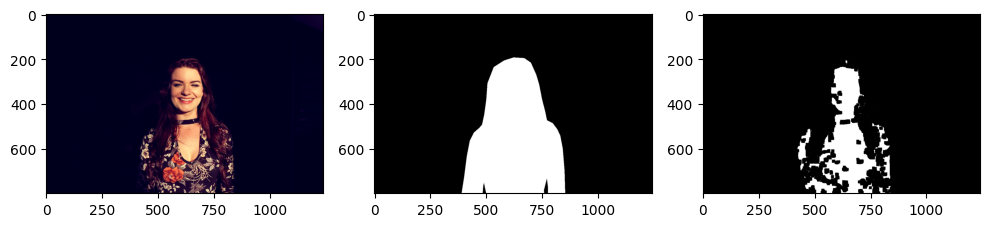

In [145]:
# 検出結果の確認
sample_file = "001.png"

image = cv2.imread(f"{target_folder}images/{sample_file}")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mask = cv2.imread(f"{target_folder}masks/{sample_file}")
mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

detection = cv2.imread(f"{target_folder}detection/{sample_file}")
detection_gray = cv2.cvtColor(detection, cv2.COLOR_BGR2GRAY)

iou = IOU(mask_gray, detection_gray)
print(f"IOU: {np.round(iou, 3)}") 

# 結果を表示
fig, axes = plt.subplots(1, 3, tight_layout=True, figsize=(10, 10))
axes[0].imshow(image_rgb)
axes[1].imshow(mask_gray, cmap="gray")
axes[2].imshow(detection_gray, cmap="gray")

In [146]:
# IOUの算出
iou_list = []

for i in range(size):
    filename = str(i).zfill(3) + ".png"

    mask = cv2.imread(f"{target_folder}masks/{filename}")
    mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    
    output = cv2.imread(f"{target_folder}detection/{filename}")
    output_gray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
    
    iou = IOU(mask_gray, output_gray)
    iou_list.append(iou)
    
print(f"Average of IOU: {np.round(np.mean(iou_list), 5)}") 

Average of IOU: 0.26038
